In [1]:
import matplotlib.pyplot as plt
from splane import *
import numpy as np
import scipy.signal as sig
from splane import analyze_sys
from scipy import signal
import matplotlib.pyplot as plt
from splane import bodePlot, pzmap
import sympy as sp
import math
from IPython.display import display, Math, Image


## Ejercicio 1

<img src="fotos/TS4_1-1.png" align="center" width="800" /> 


Si $Z_a$ es un capacitor y el resto son

## Ejercicio 2 parte 1

Tomamos una transferencia Notch normalizada, pasabajos y con el denominador correspondiente a un butterworth de segundo orden:

$$T(s) = K \cdot \frac{s^2 + {w_n}^2}{ (s^2 + \sqrt{2}s + 1)}$$

Tiene una frecuencia de corte de w = 2, así que

$$T(s) = \frac{s^2 + 4}{ (s^2 + \sqrt{2}s + 1)}$$

La ganancia ahí es de 4, $20log(4) \approx 12 $ que es lo que observamos en la imagen

Finalmente queda:

$$w_n = 0$$
$$w_p = 1$$
$$Q_p = \frac{1}{\sqrt{2}}$$
$$w_n = 2$$
$$K = 1$$

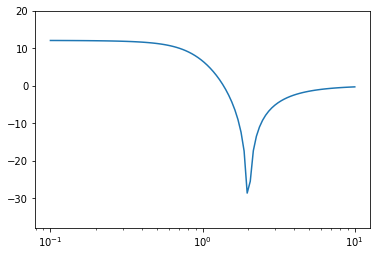

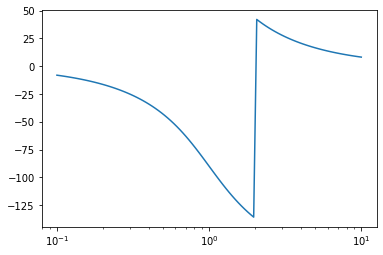

In [4]:
num=[1,0,4]
dem=[1,1.4142,1]

sys = signal.TransferFunction(num, dem)

# Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag) # Bode magnitude plot
plt.ylim([-38,20])

plt.figure()
plt.semilogx(w, phase) # Bode phase plot

plt.show()


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

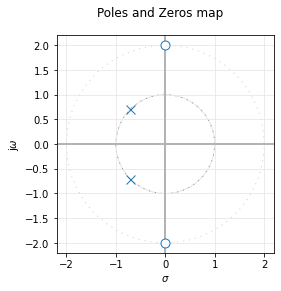

In [45]:
pzmap(sys) # Diagrama de polos y ceros. Función con efectos colaterales.

Para hacer el circuito usaremos la estructura de bicuadratica con pasivos generalizada, que tiene la siguiente transferencia:

$$T(s) = A \cdot \frac{ s^2+ s\cdot \frac{1}{RC} \cdot \frac{D}{A} + \frac{1}{LC} \cdot \frac{B}{A}}{s^2 + s \frac{1}{RC} + \frac{1}{LC}}$$

<img src="fotos/BiquadGeneralizado.png" align="center" width="300" /> 


Y tenemos: 
$$T(s) = \frac{s^2 + 4}{ (s^2 + \sqrt{2}s + 1)}$$

Si hacemos que L = 1 y C = 1 

$$T(s) = A \cdot \frac{ s^2+ s\cdot \frac{1}{R} \cdot \frac{D}{A} + \frac{B}{A}}{s^2 + s \frac{1}{R} + 1}$$

Sabemos que 1/R tiene que ser $\sqrt(2)$ entonces $R = \frac{1}{\sqrt{2}}$

$$T(s) = A \cdot \frac{ s^2+ s\cdot \sqrt{2} \cdot \frac{D}{A} + \frac{B}{A}}{s^2 + s \sqrt{2} + 1}$$

Como no hay termino medio arriba, $D = 0$,

$$T(s) = A \cdot \frac{ s^2 + \frac{B}{A}}{s^2 + s \sqrt{2} + 1}$$

Como la ganancia es 1, $A = 1$, sólo quedaría $B = 4$, quedando finalmente:

$$T(s) = \frac{ s^2 + 4}{s^2 + s \sqrt{2} + 1}$$

Pero recordando que al ser sólo pasivos y el análisis de este cirucito, $0<B<1$ y $0<A<1$, entonces declaro B = 1 y A = 0.25, cumpliendo todo menos la ganancia, tengo que amplificar este circuito cuatro veces, para ello agrego una etapa de amplificación. 

<img src="fotos/BiquadGeneralizado2.png" align="center" width="400" /> 
<img src="fotos/transfe.png" align="center" width="400" /> 


Ahí no tengo que olvidarme de desnormalizar, pero como me olvidé tuve que rehacer todo el circuito de LTSPICE y volverlo a diseñar de cero. 

Si desnormalizamos con $\omega = 2\pi \cdot 1KHz $ como pide el ejercicio, y tomamos por gusto propio una norma de 1k$\Omega$ por nuestra propia desición, quedaría:

$$ R' = R \cdot 1K\Omega$$
$$ L' = \frac{L \cdot 1K\Omega}{2\pi \cdot 1 KHz}$$
$$C' = \frac{C}{2\pi \cdot 1KHz \cdot 1K\Omega}$$

<img src="fotos/Circuito4ADesnormalizado.png" align="center" width="400" /> 
<img src="fotos/Transf4ADesnormalizada.png" align="center" width="400" /> 



## Ejercicio 2 parte 2

Intenté primero con un notch pero queda en -30dB, cuando en el dibujo ronda los -6dB, así te das cuenta rápidamente que no es un notch sino un pasabanda normalizado. 

$$T(s) = K \cdot \frac{s^2 + \frac{1}{\sqrt(2)}s + 1}{ s^2 + \sqrt{2}s + 1}$$

De esta forma obtenemos la ganancia deseada

$$w_n = 0$$
$$w_p = 1$$
$$Q_p = \frac{1}{\sqrt{2}}$$
$$w_n = 2$$
$$K = 1$$

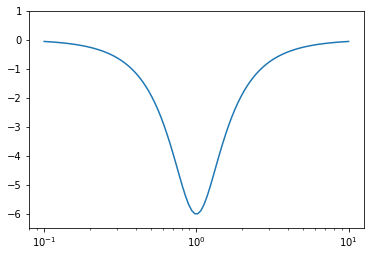

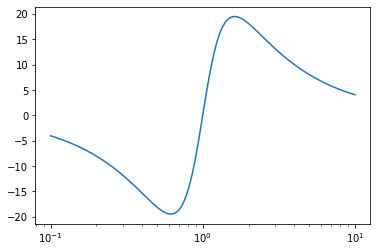

In [7]:
K = 1
num=[K*1,0.707,K*1]
dem=[1,1.4142,1]

sys = signal.TransferFunction(num, dem)

# Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag) # Bode magnitude plot
plt.ylim([-6.5,1])

plt.figure()
plt.semilogx(w, phase) # Bode phase plot

plt.show()

Para hacer el circuito, tomamos el biquad generalizado visto en clase, su transferencia es:


$$T(s) =  \frac{s^2 + \frac{1}{\sqrt(2)}s + 1}{ s^2 + \sqrt{2}s + 1}$$
$$T(s) = A \cdot \frac{ s^2+ s\cdot \frac{1}{RC} \cdot \frac{D}{A} + \frac{1}{LC} \cdot \frac{B}{A}}{s^2 + s \frac{1}{RC} + \frac{1}{LC}}$$

LC = 1 
Decido L = 1  y  C = 1

$$T(s) = A \cdot \frac{ s^2+ s\cdot \frac{1}{R} \cdot \frac{D}{A} + \frac{B}{A}}{s^2 + s \frac{1}{R} + 1}$$

Vemos que $R = 1 / \sqrt{2}$, siendo así:

$$T(s) = A \cdot \frac{ s^2+ s\cdot \sqrt{2} \cdot \frac{D}{A} + \frac{B}{A}}{s^2 + s \sqrt{2} + 1}$$

$A = 1$,

$$T(s) = \frac{ s^2+ s\cdot \sqrt{2} \cdot D + B}{s^2 + s \sqrt{2} + 1}$$

Quedando $ B = 1$ y $ D = 1 / 2$

$$T(s) = \frac{ s^2+ s\cdot \frac{1}{\sqrt{2}} + 1}{s^2 + s \sqrt{2} + 1}$$

<img src="fotos/Circuito4B.png" align="center" width="400" /> 
<img src="fotos/Transfe2.png" align="center" width="400" /> 

Si desnormalizamos con $\omega = 2\pi \cdot 1KHz $ como pide el ejercicio, y tomamos por gusto propio una norma de 1k$\Omega$ por nuestra propia desición, quedaría:

$$ R' = R \cdot 1K\Omega$$
$$ L' = \frac{L \cdot 1K\Omega}{2\pi \cdot 1 KHz}$$
$$C' = \frac{C}{2\pi \cdot 1KHz \cdot 1K\Omega}$$

<img src="fotos/Circuito4BDesnormalizado.png" align="center" width="400" /> 
<img src="fotos/Transferencia4BDesnormalizada.png" align="center" width="400" /> 



## Ejercicio 3

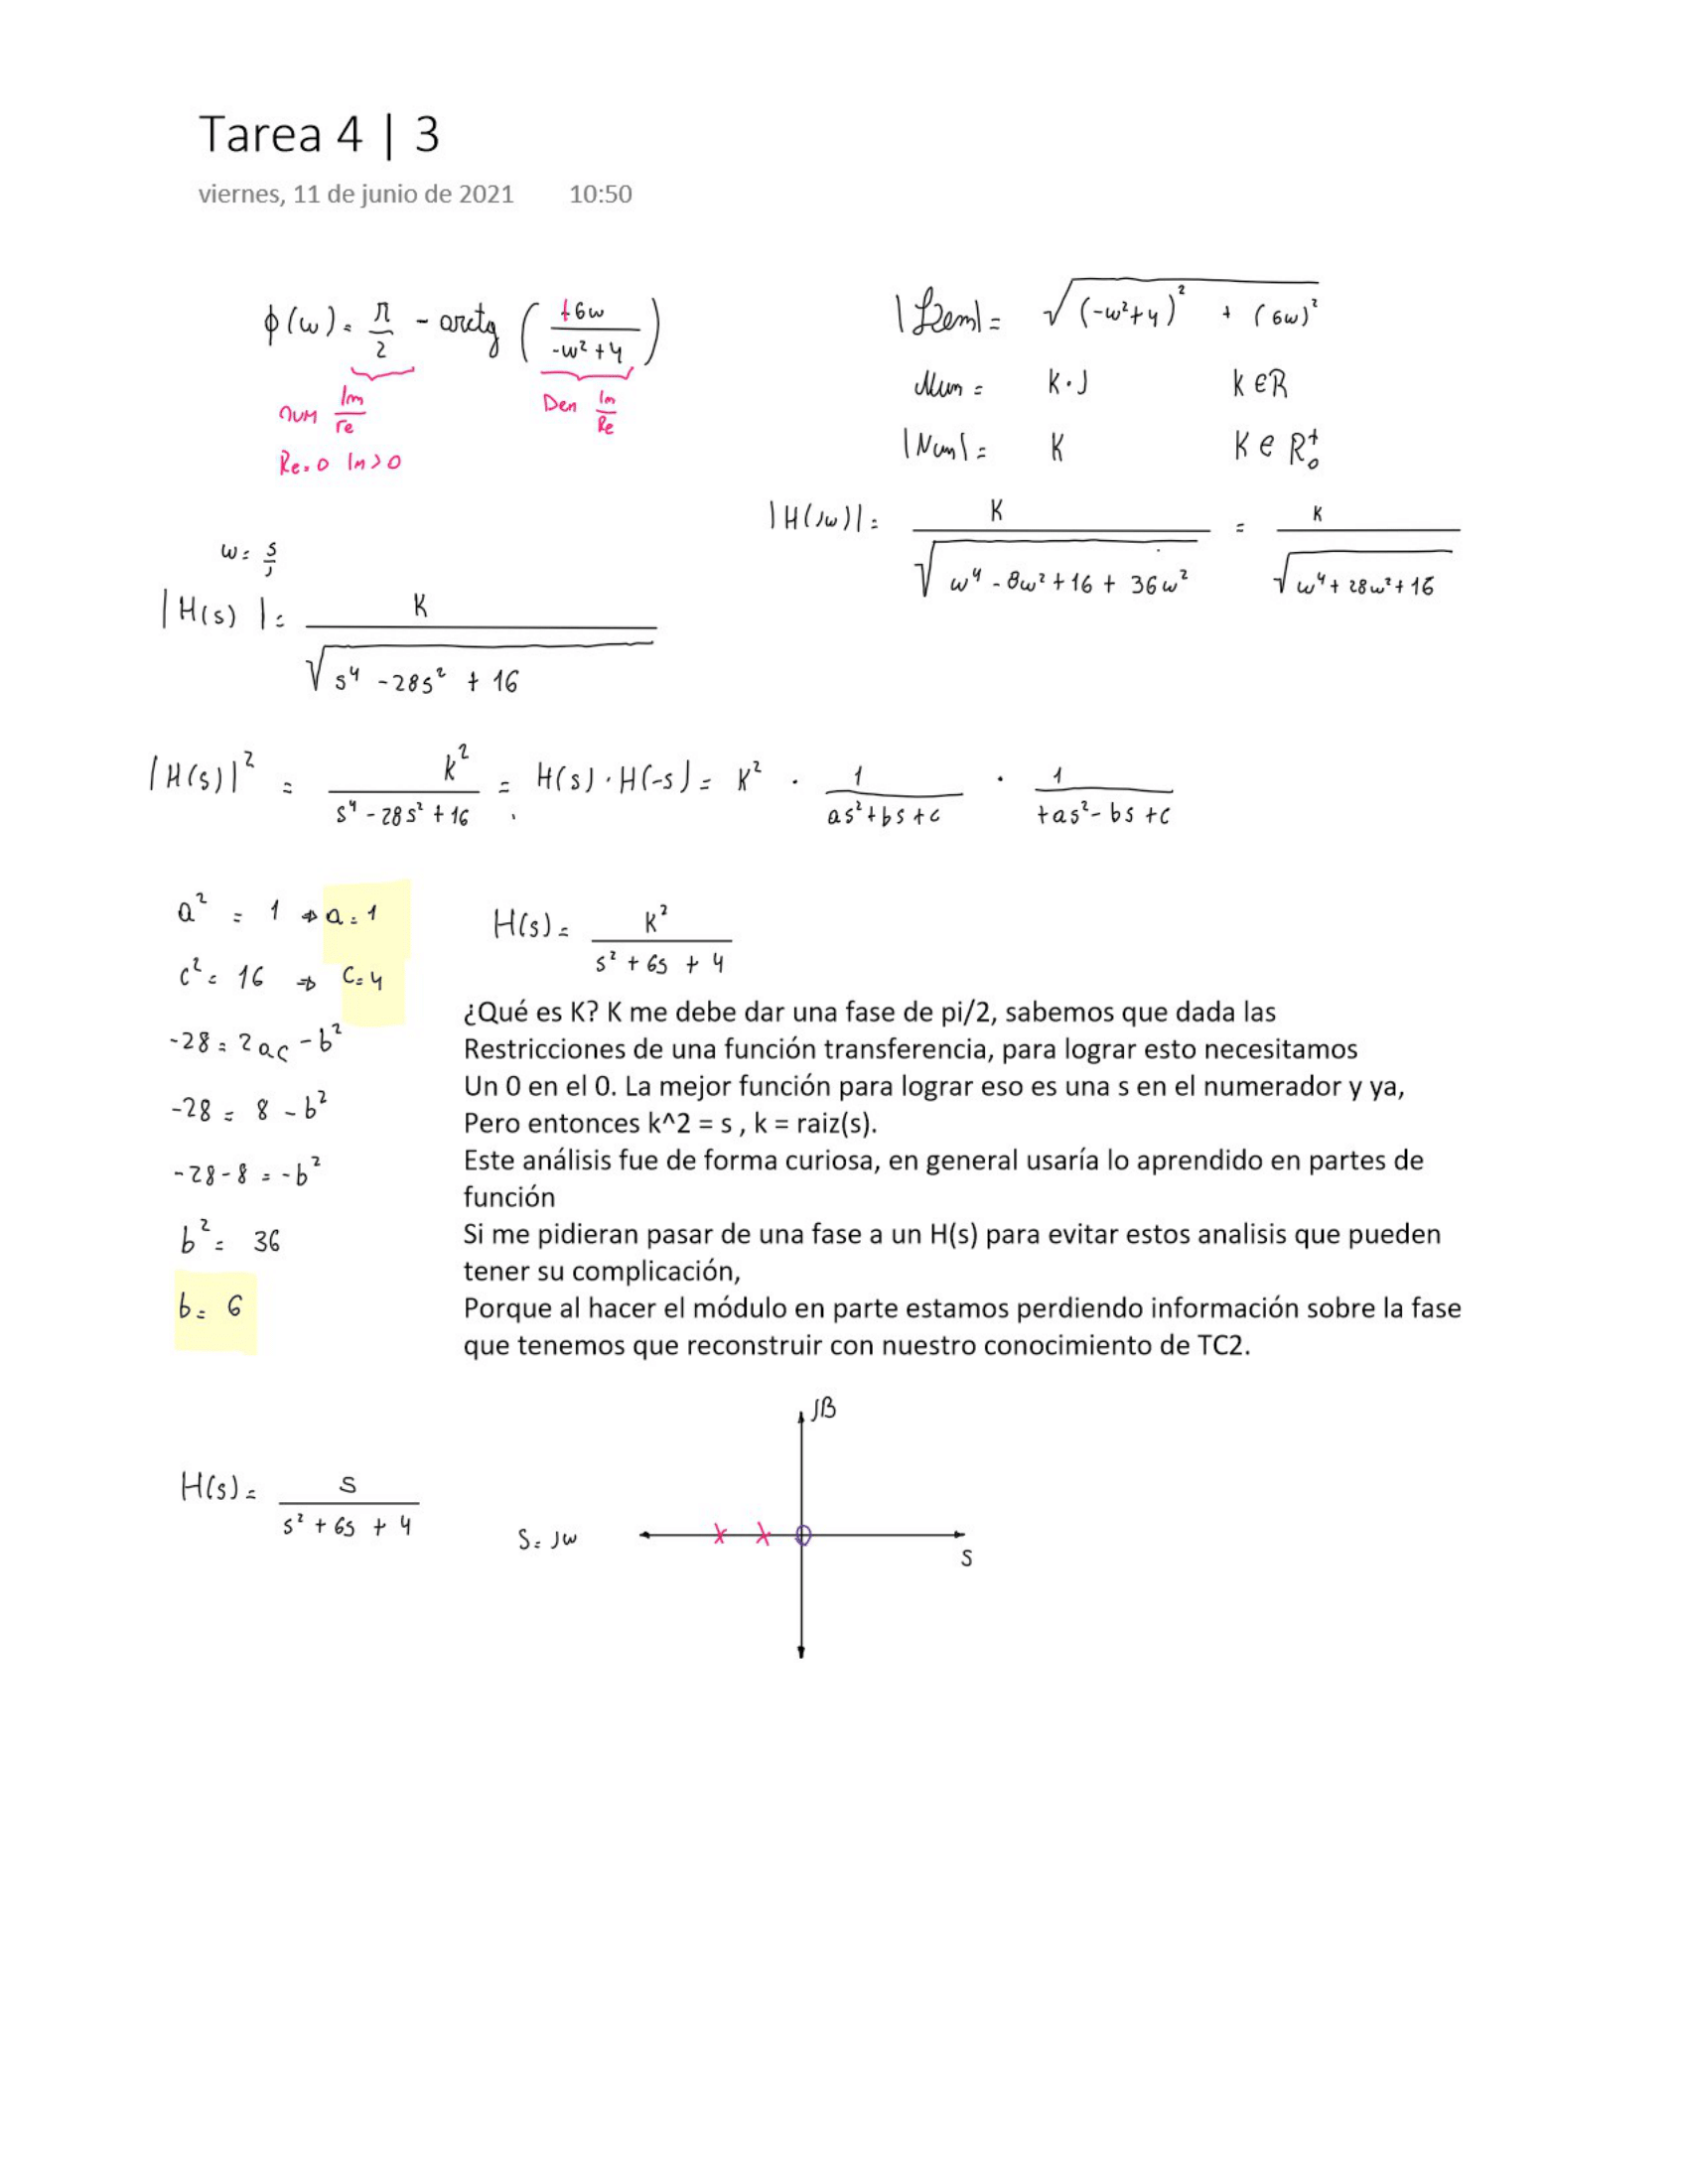

In [5]:
Image(filename='fotos/TS4_3-1.png')